# EDA

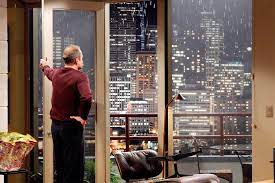

In [164]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numerize import numerize 
import plotly.express as px
import altair as alt
import plotly.graph_objects as go
from matplotlib.ticker import MaxNLocator


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [10]:
df = pd.read_csv("data/King_County_House_prices_dataset.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.000,3,2.500,1530,1131,3.000,0.000,0.000,...,8,1530,0.0,2009,0.000,98103,47.699,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.000,4,2.500,2310,5813,2.000,0.000,0.000,...,8,2310,0.0,2014,0.000,98146,47.511,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.000,2,0.750,1020,1350,2.000,0.000,0.000,...,7,1020,0.0,2009,0.000,98144,47.594,-122.299,1020,2007
21595,291310100,1/16/2015,400000.000,3,2.500,1600,2388,2.000,NaN,0.000,...,8,1600,0.0,2004,0.000,98027,47.535,-122.069,1410,1287


In [11]:
df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [12]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [ ]:
df.date = pd.to_datetime(df.date)

df['year'] = df.date.dt.year
df['year_month'] = df['date'].dt.strftime('%Y-%m')
df

In [288]:
df.corr(method="pearson")
date_df = df.groupby("date").count().reset_index()
date_df

,date,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,year_month
0,2014-05-02,67,67,67,67,67,67,67,60,67,...,67,67,56,67,67,67,67,67,67,67
1,2014-05-03,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2,2014-05-04,5,5,5,5,5,5,5,4,5,...,5,5,5,5,5,5,5,5,5,5
3,2014-05-05,84,84,84,84,84,84,84,75,84,...,84,84,63,84,84,84,84,84,84,84
4,2014-05-06,83,83,83,83,83,83,83,77,83,...,83,83,69,83,83,83,83,83,83,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,2015-05-13,31,31,31,31,31,31,31,28,31,...,31,31,25,31,31,31,31,31,31,31
368,2015-05-14,11,11,11,11,11,11,11,9,11,...,11,11,10,11,11,11,11,11,11,11
369,2015-05-15,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
370,2015-05-24,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
fig = go.Figure(go.Scatter(
    x = date_df['date'],
    y = date_df['id'],
    labels ={'id':'Houses sold at each month'}
))

fig.update_layout(
    title = 'Time Series with Custom Date-Time Format',
    xaxis_tickformat = '%d %B (%a)<br>%Y'
)

#zip_df.rename(columns={'bedrooms' : 'count'},inplace=True)

In [290]:
date_df.rename(columns={'id':'houses sold'},inplace=True)
date_df

,date,houses sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,year_month
0,2014-05-02,67,67,67,67,67,67,67,60,67,...,67,67,56,67,67,67,67,67,67,67
1,2014-05-03,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2,2014-05-04,5,5,5,5,5,5,5,4,5,...,5,5,5,5,5,5,5,5,5,5
3,2014-05-05,84,84,84,84,84,84,84,75,84,...,84,84,63,84,84,84,84,84,84,84
4,2014-05-06,83,83,83,83,83,83,83,77,83,...,83,83,69,83,83,83,83,83,83,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,2015-05-13,31,31,31,31,31,31,31,28,31,...,31,31,25,31,31,31,31,31,31,31
368,2015-05-14,11,11,11,11,11,11,11,9,11,...,11,11,10,11,11,11,11,11,11,11
369,2015-05-15,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
370,2015-05-24,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [292]:
px.scatter(date_df, x = 'date', y= 'houses sold' , color='houses sold')


In [15]:
new_df = df[['price', 'bedrooms','sqft_living','condition', 'grade', 'zipcode' , 'sqft_living15', 'sqft_lot15','year','year_month']]
new_df


,price,bedrooms,sqft_living,condition,grade,zipcode,sqft_living15,sqft_lot15,year,year_month
0,221900.000,3,1180,3,7,98178,1340,5650,2014,2014-10
1,538000.000,3,2570,3,7,98125,1690,7639,2014,2014-12
2,180000.000,2,770,3,6,98028,2720,8062,2015,2015-02
3,604000.000,4,1960,5,7,98136,1360,5000,2014,2014-12
4,510000.000,3,1680,3,8,98074,1800,7503,2015,2015-02
...,...,...,...,...,...,...,...,...,...,...
21592,360000.000,3,1530,3,8,98103,1530,1509,2014,2014-05
21593,400000.000,4,2310,3,8,98146,1830,7200,2015,2015-02
21594,402101.000,2,1020,3,7,98144,1020,2007,2014,2014-06
21595,400000.000,3,1600,3,8,98027,1410,1287,2015,2015-01


In [192]:
zip_df = new_df.groupby('zipcode').count().sort_values("price", ascending=False)
#zip_df = zip_df[zip_df['price'] > zip_df['price'].mean()].sort_values("price", ascending=False)
zip_df.rename(columns={'bedrooms' : 'count'},inplace=True)

zip_df = zip_df['count'].reset_index()
zip_df
#new_df1[new_df1['price'] > new_df1['price'].mean()].sort_values('price',ascending= False)
#df.rename(columns={'n_rings': 'nr_rings'}, inplace=True)


,zipcode,count
0,98103,602
1,98038,589
2,98115,583
3,98052,574
4,98117,553
...,...,...
65,98102,104
66,98010,100
67,98024,80
68,98148,57


In [191]:
#zip_df1 = new_df[new_df['price'] > new_df['price'].mean()].sort_values("price", ascending=False)
zip_df1 = new_df.groupby('zipcode').mean()['price'].reset_index()
zip_df1

,zipcode,price
0,98001,281194.870
1,98002,234284.035
2,98003,294111.279
3,98004,1356523.991
4,98005,810289.696
...,...,...
65,98177,676419.392
66,98178,310612.756
67,98188,289078.346
68,98198,302896.739


In [ ]:
zip_plot_df = pd.merge(zip_df,zip_df1, on=['zipcode'],how = 'outer').reset_index()
zip_plot_df = zip_plot_df[zip_plot_df['count'] > zip_plot_df['count'].mean()].sort_values('count',ascending=False)
zip_plot_df
#pd.merge(df3, df4, on=['student_id'],how='outer')


In [ ]:
#from matplotlib.ticker import MaxNLocator

fig, ax3 = plt.subplots(figsize=(16,8))

color1 = 'blue'
ax3.scatter(zip_plot_df.zipcode, zip_plot_df.count, color = color1 )
ax3.set_ylabel('No.of houses sold',color = color1)
ax3.tick_params(axis='y', labelcolor = color1)
#ax1.legend()

ax4 = ax3.twinx()
ax3.set_xlabel('Area of house in Sq.ft', fontsize = 20)


color2 = 'black'
ax4.scatter(zip_plot_df.zipcode, zip_plot_df.price, color = color2)
ax4.set_ylabel('The average price of each house',color = color2);
ax4.tick_params(axis='y', labelcolor = color2)
#ax2.legend()
#ax.xaxis.set_major_locator(MaxNLocator(40))


#plt.xlabel('The area of house in Sq.ft', fontsize=15)




In [ ]:
#px.scatter(df_weather, x='temp_min', y='temp_max', color='weather', color_discrete_map=weatherdict, title='Temperature Relation')

px.scatter(zip_df, x = 'zipcode', y= 'count' , color='count')


In [213]:
alt.Chart(zip_plot_df).mark_circle().encode(
   x= alt.X("zipcode", scale = alt.Scale(zero = False)),
   y="count",
   color = "count"
).properties(
   height=300, width=900
)

alt.Chart(...)

In [211]:
alt.Chart(zip_plot_df).mark_bar().encode(
   x= alt.X("zipcode", scale = alt.Scale(zero = False)),
   y="price",
   color = "price"
).properties(
   height=300, width=900
)   

alt.Chart(...)

In [332]:
base = alt.Chart(zip_plot_df).encode(
    alt.X('zipcode', axis=alt.Axis(title='Zipcodes'),scale = alt.Scale(zero = False))
)

area = base.mark_area(opacity=0.3, color='#57A44C').encode(
    alt.Y('count',
          axis=alt.Axis(title='The no.of Houses sold', titleColor='#57A44C')),
    #alt.Y2('average(temp_min)')
)

line = base.mark_square(stroke='#5276A7', interpolate='monotone').encode(
    alt.Y('price',
          axis=alt.Axis(title = 'Price of the houses', titleColor='#5276A7'))
)

alt.layer(area, line).resolve_scale(
    y = 'independent'
).properties(width=900,
    height=400)


alt.LayerChart(...)

In [16]:
new_df.corr(method="pearson")

,price,bedrooms,sqft_living,condition,grade,zipcode,sqft_living15,sqft_lot15,year
price,1.000,0.309,0.702,0.036,0.668,-0.053,0.585,0.083,0.004
bedrooms,0.309,1.000,0.578,0.026,0.357,-0.154,0.393,0.031,-0.010
sqft_living,0.702,0.578,1.000,-0.059,0.763,-0.200,0.756,0.184,-0.029
condition,0.036,0.026,-0.059,1.000,-0.147,0.003,-0.093,-0.003,-0.046
grade,0.668,0.357,0.763,-0.147,1.000,-0.186,0.714,0.121,-0.031
zipcode,-0.053,-0.154,-0.200,0.003,-0.186,1.000,-0.279,-0.147,0.001
sqft_living15,0.585,0.393,0.756,-0.093,0.714,-0.279,1.000,0.184,-0.022
sqft_lot15,0.083,0.031,0.184,-0.003,0.121,-0.147,0.184,1.000,0.000
year,0.004,-0.010,-0.029,-0.046,-0.031,0.001,-0.022,0.000,1.000


In [316]:
sqft_living15_df = new_df.groupby('sqft_living15').mean().reset_index()
sqft_living15_df 
#new_df1[new_df1['price'] > new_df1['price'].mean()].sort_values('price',ascending= False)


,sqft_living15,price,bedrooms,sqft_living,condition,grade,zipcode,sqft_lot15,year
0,399,536000.000,3.000,2290.000,4.000,7.000,98042.000,275299.000,2015.000
1,460,317750.000,3.500,1970.000,3.500,7.500,98125.000,18000.000,2014.000
2,620,260000.000,2.000,620.000,3.000,6.000,98126.000,4760.000,2014.500
3,670,314000.000,2.000,720.000,3.000,6.000,98126.000,4920.000,2014.000
4,690,242000.000,2.000,685.000,3.000,7.000,98103.000,1058.500,2014.500
...,...,...,...,...,...,...,...,...,...
772,5600,1250000.000,4.000,3830.000,4.000,11.000,98077.000,56568.000,2014.000
773,5610,1950000.000,4.000,7420.000,3.000,12.000,98045.000,169549.000,2015.000
774,5790,1600000.000,4.833,5121.667,3.000,10.667,98023.667,13633.167,2014.333
775,6110,2980000.000,5.000,7400.000,3.000,13.000,98006.000,26442.000,2014.000


In [319]:
#new_df1[new_df1['price'] > new_df1['price'].mean()].sort_values('price',ascending= False)
sqft_living15_df = sqft_living15_df[sqft_living15_df['price'] > sqft_living15_df['price'].mean()].sort_values('price',ascending=False).reset_index()
sqft_living15_df

,index,sqft_living15,price,bedrooms,sqft_living,condition,grade,zipcode,sqft_lot15,year
0,745,4740,4210000.000,5.000,7440.000,3.000,12.000,98006.000,19329.000,2015.000
1,728,4540,3975000.000,5.000,7175.000,3.000,12.000,98057.000,29926.000,2014.000
2,762,5070,3800000.000,5.000,7050.000,4.000,13.000,98004.000,20570.000,2014.000
3,702,4260,3400000.000,4.000,4260.000,3.000,11.000,98112.000,10408.000,2015.000
4,755,4913,3200000.000,4.000,7000.000,4.000,12.000,98075.000,14663.000,2014.000
...,...,...,...,...,...,...,...,...,...,...
262,403,2410,713170.817,3.667,2523.667,3.317,8.200,98056.283,19901.450,2014.300
263,590,3335,710000.000,5.000,3920.000,3.000,9.000,98065.000,7258.000,2015.000
264,464,2615,705640.000,3.000,2400.000,4.000,8.000,98033.000,12043.000,2015.000
265,481,2670,704040.760,3.760,2853.800,3.260,8.400,98051.040,18273.700,2014.380


In [327]:
base = alt.Chart(sqft_living15_df).encode(
    alt.X('sqft_living15', axis=alt.Axis(title='The square footage of interior housing living space for the nearest 15 neighbors'),scale = alt.Scale(zero = False))
)

area = base.mark_circle(opacity=0.3, color='darkblue').encode(
    alt.Y('grade',
          axis=alt.Axis(title='Grade of the house', titleColor='#5276A7')),
    #alt.Y2('average(temp_min)')
)

#line = base.mark_square(stroke='#5276A7', interpolate='monotone').encode(
    #alt.Y('price',
         # axis=alt.Axis(title = 'Price of the houses', titleColor='#5276A7'))
#)

alt.layer(area).resolve_scale(
    y = 'independent'
).properties(width=900,
    height=400)


alt.LayerChart(...)

In [ ]:
#sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

sns.heatmap(new_df,annot=True)
plt.show()

In [257]:
#new_df1 = new_df.groupby(['year_month','condition']).mean()
new_df1 = new_df.groupby('grade').count().reset_index()
new_df1.rename(columns={'bedrooms':'count'}, inplace=True)
new_df1
#df.rename(columns={'n_rings': 'nr_rings'}, inplace=True)


,grade,price,count,sqft_living,condition,zipcode,sqft_living15,sqft_lot15,year,year_month
0,3,1,1,1,1,1,1,1,1,1
1,4,27,27,27,27,27,27,27,27,27
2,5,242,242,242,242,242,242,242,242,242
3,6,2038,2038,2038,2038,2038,2038,2038,2038,2038
4,7,8974,8974,8974,8974,8974,8974,8974,8974,8974
5,8,6065,6065,6065,6065,6065,6065,6065,6065,6065
6,9,2615,2615,2615,2615,2615,2615,2615,2615,2615
7,10,1134,1134,1134,1134,1134,1134,1134,1134,1134
8,11,399,399,399,399,399,399,399,399,399
9,12,89,89,89,89,89,89,89,89,89


In [255]:
new_df2 = new_df.groupby('grade').mean()['price'].reset_index()
new_df2


,grade,price
0,3,262000.000
1,4,212001.852
2,5,248523.971
3,6,301916.571
4,7,402594.573
5,8,542986.800
6,9,773738.222
7,10,1072347.467
8,11,1497792.378
9,12,2202528.090


In [261]:
grade_df = pd.merge(new_df1,new_df2, on=['grade'],how='outer')
grade_df
#sqft_df = pd.merge(new_df6, new_df7, on=['sqft_living'],how='outer')


,grade,price_x,count,sqft_living,condition,zipcode,sqft_living15,sqft_lot15,year,year_month,price_y
0,3,1,1,1,1,1,1,1,1,1,262000.000
1,4,27,27,27,27,27,27,27,27,27,212001.852
2,5,242,242,242,242,242,242,242,242,242,248523.971
3,6,2038,2038,2038,2038,2038,2038,2038,2038,2038,301916.571
4,7,8974,8974,8974,8974,8974,8974,8974,8974,8974,402594.573
5,8,6065,6065,6065,6065,6065,6065,6065,6065,6065,542986.800
6,9,2615,2615,2615,2615,2615,2615,2615,2615,2615,773738.222
7,10,1134,1134,1134,1134,1134,1134,1134,1134,1134,1072347.467
8,11,399,399,399,399,399,399,399,399,399,1497792.378
9,12,89,89,89,89,89,89,89,89,89,2202528.090


In [270]:
base = alt.Chart(grade_df).encode(
    alt.X('grade', axis=alt.Axis(title='Grade of the House'),scale = alt.Scale(zero = False))
)

area = base.mark_area(opacity=0.3, color='#57A44C').encode(
    alt.Y('count',
          axis=alt.Axis(title='The no.of Houses sold', titleColor='#57A44C')),
    #alt.Y2('average(temp_min)')
)

line = base.mark_line(stroke='#5276B6', interpolate='monotone').encode(
    alt.Y('price_y',
          axis=alt.Axis(title = 'Price of the houses', titleColor='#5276A7'))
)

alt.layer(area, line).resolve_scale(
    y = 'independent'
).properties(width=900,
    height=400)


alt.LayerChart(...)

Text(0, 0.5, 'average price')

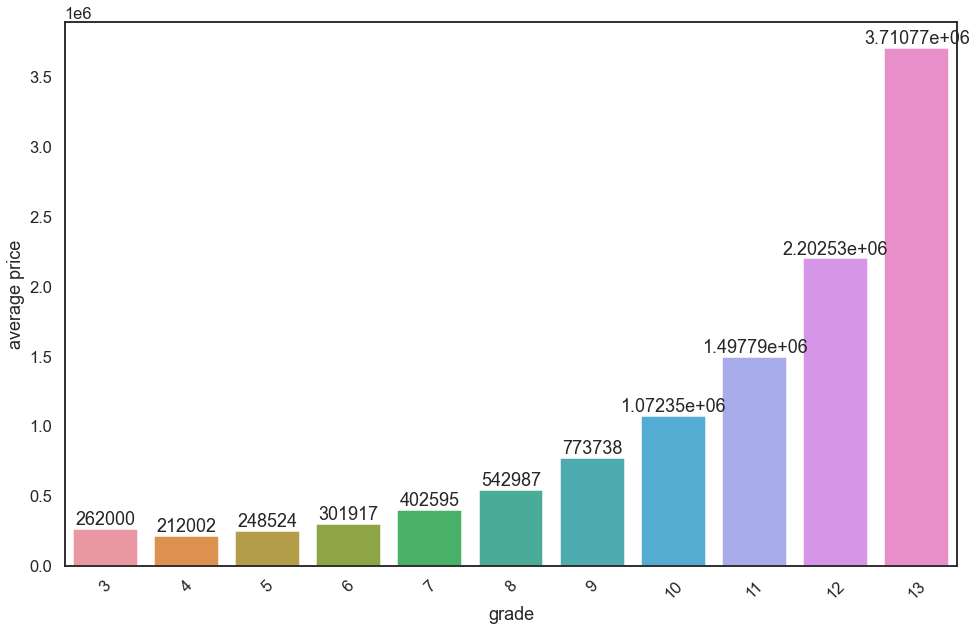

In [25]:
# Your code/plot here!

from matplotlib.ticker import MaxNLocator
sns.set_theme(style="white", context="talk")
f, my_sea_plt = plt.subplots(figsize = (16, 10))
my_sea_plt = sns.barplot(x = new_df2.grade, y = new_df2.price)

my_sea_plt.set_xticklabels(my_sea_plt.get_xticklabels(), rotation = 45)
my_sea_plt.bar_label(my_sea_plt.containers[0])
#my_sea_plt.set_label()
#my_sea_plt.set_xlabel("houses sold")
my_sea_plt.set_ylabel("average price")
#my_sea_plt.set_title("Maximum temperature per month. Years 2012 - 2015")
#my_sea_plt.xaxis.set_major_locator(MaxNLocator(10))


In [ ]:
base = alt.Chart(zip_plot_df).encode(
    alt.X('zipcode', axis=alt.Axis(title='Zipcodes'),scale = alt.Scale(zero = False))
)

area = base.mark_area(opacity=0.3, color='#57A44C').encode(
    alt.Y('count',
          axis=alt.Axis(title='The no.of Houses sold', titleColor='#57A44C')),
    #alt.Y2('average(temp_min)')
)

line = base.mark_line(stroke='#5276A7', interpolate='monotone').encode(
    alt.Y('price',
          axis=alt.Axis(title = 'Price of the houses', titleColor='#5276A7'))
)

alt.layer(area, line).resolve_scale(
    y = 'independent'
).properties(width=900,
    height=400)


Text(0, 0.5, 'houses sold')

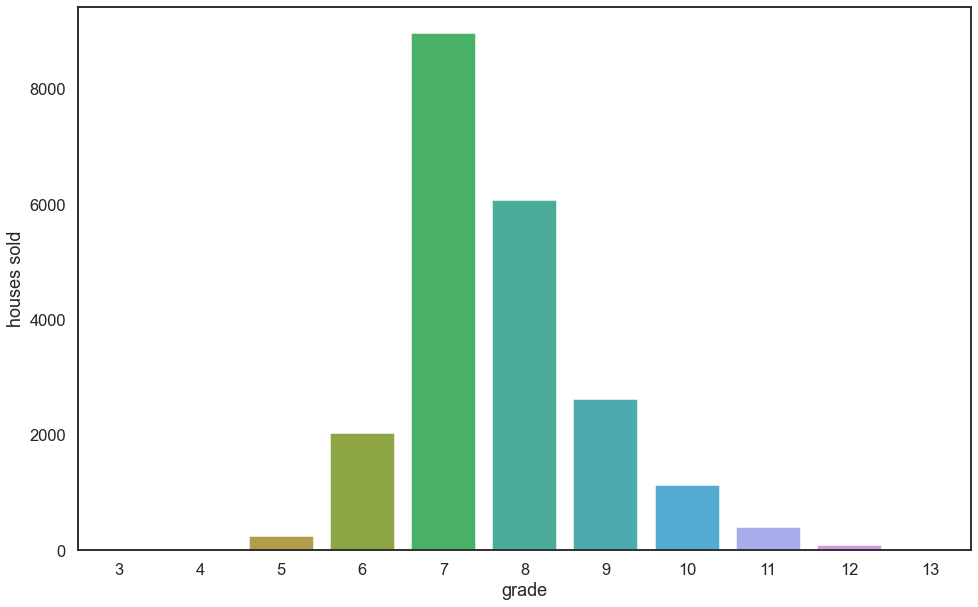

In [250]:
# Your code/plot here!

#from matplotlib.ticker import MaxNLocator
sns.set_theme(style="white", context="talk")
f, my_sea_plt = plt.subplots(figsize = (16, 10))
my_sea_plt = sns.barplot(x = new_df1.grade, y = new_df1.price)
#my_sea_plt.bar_label(my_sea_plt.containers[0])


#my_sea_plt.set_xticklabels(my_sea_plt.get_xticklabels(), rotation = 45)
#my_sea_plt.set_label()
#my_sea_plt.set_xlabel("houses sold")
my_sea_plt.set_ylabel("houses sold")
#my_sea_plt.set_title("Maximum temperature per month. Years 2012 - 2015")
#my_sea_plt.xaxis.set_major_locator(MaxNLocator(10))


In [ ]:
new_df4 = new_df.groupby(['bedrooms']).count().reset_index()
new_df4


,bedrooms,price,sqft_living,condition,grade,zipcode,sqft_living15,sqft_lot15,year,year_month
0,1,196,196,196,196,196,196,196,196,196
1,2,2760,2760,2760,2760,2760,2760,2760,2760,2760
2,3,9824,9824,9824,9824,9824,9824,9824,9824,9824
3,4,6882,6882,6882,6882,6882,6882,6882,6882,6882
4,5,1601,1601,1601,1601,1601,1601,1601,1601,1601
5,6,272,272,272,272,272,272,272,272,272
6,7,38,38,38,38,38,38,38,38,38
7,8,13,13,13,13,13,13,13,13,13
8,9,6,6,6,6,6,6,6,6,6
9,10,3,3,3,3,3,3,3,3,3


Text(0, 0.5, 'houses sold')

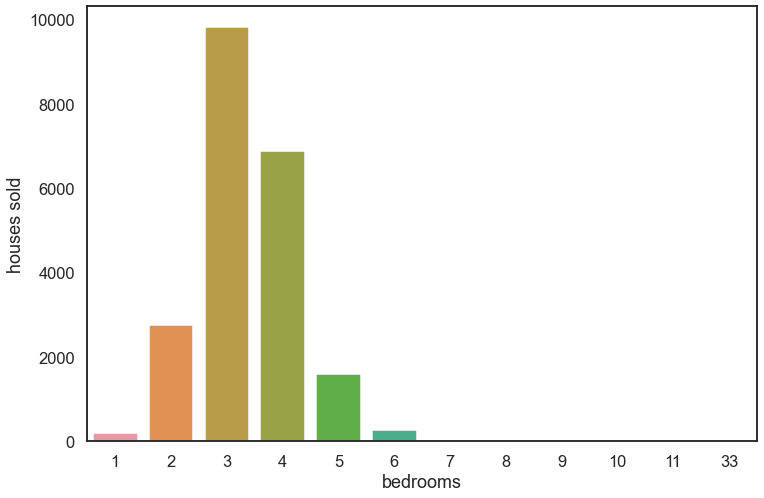

In [333]:
# Your code/plot here!

#from matplotlib.ticker import MaxNLocator
sns.set_theme(style="white", context="talk")
f, my_sea_plt = plt.subplots(figsize = (12, 8))
my_sea_plt = sns.barplot(x = new_df4.bedrooms, y = new_df4.price)

#my_sea_plt.set_xticklabels(my_sea_plt.get_xticklabels(), rotation = 45)
#my_sea_plt.set_label()
#my_sea_plt.set_xlabel("houses sold")
my_sea_plt.set_ylabel("houses sold")
#my_sea_plt.set_title("Maximum temperature per month. Years 2012 - 2015")
#my_sea_plt.xaxis.set_major_locator(MaxNLocator(10))


Text(0, 0.5, 'houses price')

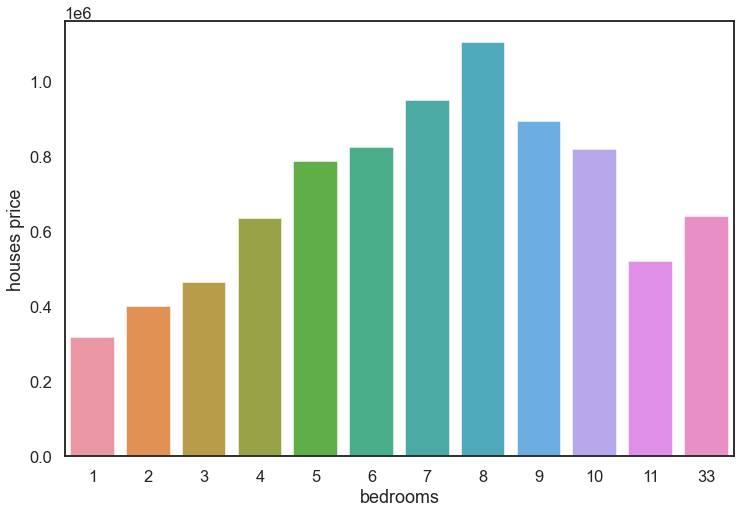

In [330]:
new_df5 = new_df.groupby(['bedrooms']).mean().reset_index()


# Your code/plot here!

#from matplotlib.ticker import MaxNLocator
sns.set_theme(style="white", context="talk")
f, my_sea_plt = plt.subplots(figsize = (12, 8))
my_sea_plt = sns.barplot(x = new_df5.bedrooms, y = new_df5.price)

#my_sea_plt.set_xticklabels(my_sea_plt.get_xticklabels(), rotation = 45)
#my_sea_plt.set_label()
#my_sea_plt.set_xlabel("houses sold")
my_sea_plt.set_ylabel("houses price")
#my_sea_plt.set_title("Maximum temperature per month. Years 2012 - 2015")
#my_sea_plt.xaxis.set_major_locator(MaxNLocator(10))


In [ ]:
#new_df1[new_df1['price'] > new_df1['price'].mean()].sort_values('price',ascending= False)


In [70]:
new_df6 = new_df.groupby(['sqft_living']).count().sort_values('price',ascending=False)["grade"].reset_index()
new_df6

,sqft_living,grade
0,1300,138
1,1400,135
2,1440,133
3,1660,129
4,1010,129
...,...,...
1029,2456,1
1030,2473,1
1031,2478,1
1032,2481,1


In [71]:
new_df7 = new_df.groupby(['sqft_living']).mean().sort_values('price',ascending=False)["price"].reset_index()
new_df7


,sqft_living,price
0,12050,7700000.000
1,10040,7060000.000
2,9890,6890000.000
3,9200,5570000.000
4,8000,5350000.000
...,...,...
1029,902,152000.000
1030,490,150000.000
1031,500,125000.000
1032,828,110000.000


In [144]:
sqft_df = pd.merge(new_df6, new_df7, on=['sqft_living'],how='outer')
sqft_df = sqft_df[sqft_df['grade'] > sqft_df['grade'].mean()]
#sqft_df = sqft_df.sort_values("grade",ascending=False)
sqft_df = sqft_df.eval("over_all = grade * price")
sqft_df.rename(columns={'grade': 'no_sold'}, inplace=True)

sqft_df
#df.eval('weight_per_hight = weight_whole / diameter', inplace = True)
#df.rename(columns={'n_rings': 'nr_rings'}, inplace=True)
#df.groupby("price").count().sort_values("sqft_living15",ascending= False).head(20)
#df[df['chlorides'] > df['chlorides'].mean()]


,sqft_living,no_sold,price,over_all
0,1300,138,375037.254,51755141.000
1,1400,135,358100.511,48343569.000
2,1440,133,383562.466,51013808.000
3,1660,129,427220.016,55111382.000
4,1010,129,308745.248,39828137.000
...,...,...,...,...
277,3510,21,919226.571,19303758.000
278,3470,21,1019328.571,21405900.000
279,3520,21,964475.714,20253990.000
280,3680,21,1010622.857,21223080.000


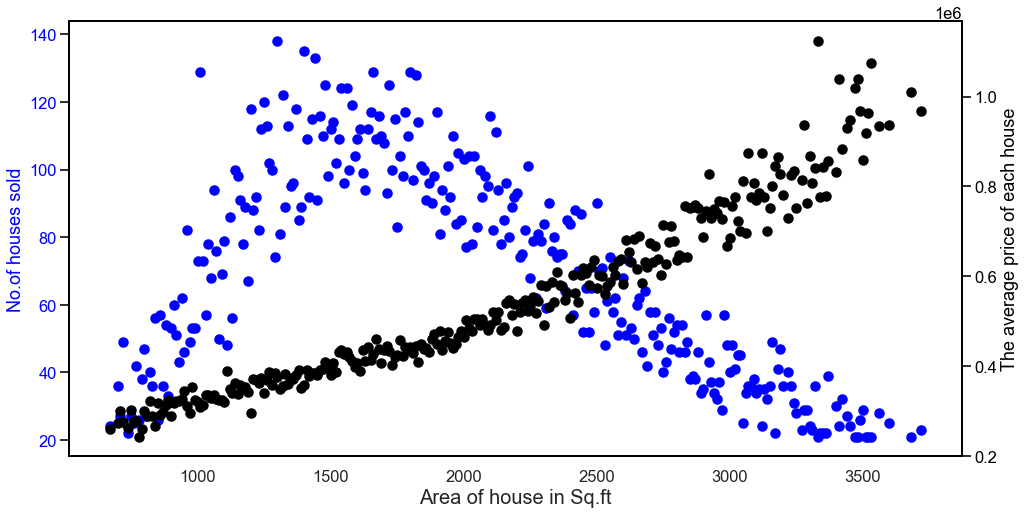

In [178]:
from matplotlib.ticker import MaxNLocator

fig, ax1 = plt.subplots(figsize=(16,8))

color1 = 'blue'
ax1.scatter(sqft_df.sqft_living, sqft_df.no_sold, color = color1 )
ax1.set_ylabel('No.of houses sold',color = color1)
ax1.tick_params(axis='y', labelcolor = color1)
#ax1.legend()

ax2 = ax1.twinx()
ax1.set_xlabel('Area of house in Sq.ft', fontsize = 20)


color2 = 'black'
ax2.scatter(sqft_df.sqft_living, sqft_df.price, color = color2)
ax2.set_ylabel('The average price of each house',color = color2);
ax2.tick_params(axis='y', labelcolor = color2)
#ax2.legend()
#ax.xaxis.set_major_locator(MaxNLocator(40))


#plt.xlabel('The area of house in Sq.ft', fontsize=15)




In [ ]:
px.scatter(sqft_df, x='sqft_living', y='no_sold')


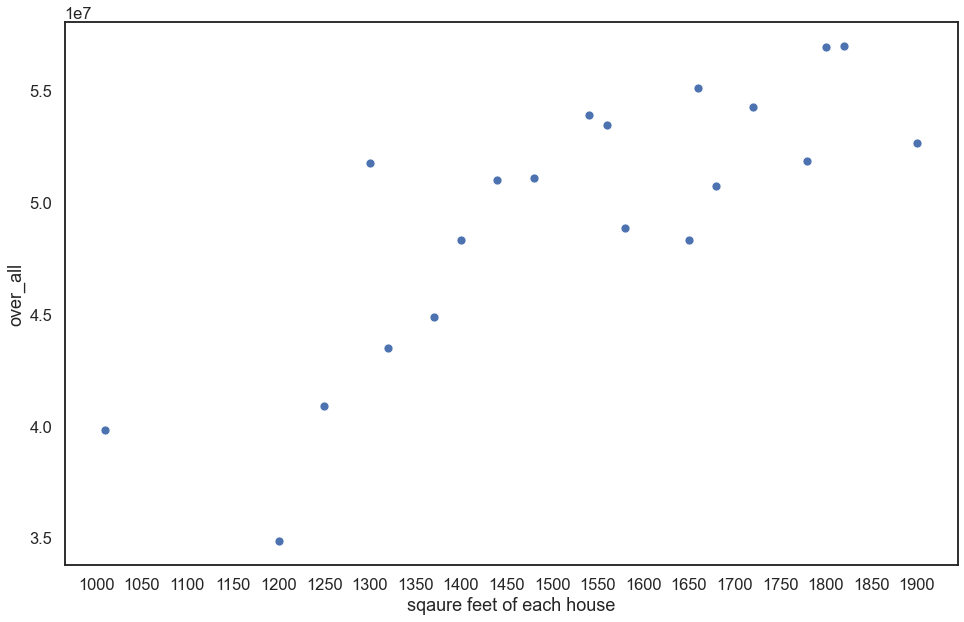

In [ ]:
#new_df6 = new_df.groupby(['sqft_living']).count().reset_index()


# Your code/plot here!

from matplotlib.ticker import MaxNLocator
sns.set_theme(style="white", context="talk")
f, my_sea_plt = plt.subplots(figsize = (16, 10))
my_sea_plt = sns.scatterplot(y = sqft_df.over_all, x = sqft_df.sqft_living)

#my_sea_plt.set_xticklabels(my_sea_plt.get_xticklabels(), rotation = 45)
#my_sea_plt.set_label()
my_sea_plt.set_xlabel("sqaure feet of each house")
#my_sea_plt.set_ylabel("average price of each house")
#my_sea_plt.set_title("Maximum temperature per month. Years 2012 - 2015")
my_sea_plt.xaxis.set_major_locator(MaxNLocator(20))


In [ ]:
new_df.corr(method="pearson")


,price,bedrooms,sqft_living,condition,grade,zipcode,sqft_living15,sqft_lot15
price,1.000,0.309,0.702,0.036,0.668,-0.053,0.585,0.083
bedrooms,0.309,1.000,0.578,0.026,0.357,-0.154,0.393,0.031
sqft_living,0.702,0.578,1.000,-0.059,0.763,-0.200,0.756,0.184
condition,0.036,0.026,-0.059,1.000,-0.147,0.003,-0.093,-0.003
grade,0.668,0.357,0.763,-0.147,1.000,-0.186,0.714,0.121
zipcode,-0.053,-0.154,-0.200,0.003,-0.186,1.000,-0.279,-0.147
sqft_living15,0.585,0.393,0.756,-0.093,0.714,-0.279,1.000,0.184
sqft_lot15,0.083,0.031,0.184,-0.003,0.121,-0.147,0.184,1.000


In [ ]:
#df.groupby("price").count().sort_values("sqft_living15",ascending= False).head(20)
#df[df['chlorides'] > df['chlorides'].mean()]
df[df['price'] > df['price'].mean()]

#df[df.groupby("date").count().mean()]

In [ ]:
df2 = df.groupby("sqft_living15").count().reset_index()
df2 = df2.sort_values('id',ascending=False)
df2

,sqft_living15,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,year,year_month
173,1540,197,197,197,197,197,197,197,197,171,...,197,197,197,167,197,197,197,197,197,197
140,1440,195,195,195,195,195,195,195,195,173,...,195,195,195,161,195,195,195,195,195,195
178,1560,192,192,192,192,192,192,192,192,173,...,192,192,192,165,192,192,192,192,192,192
160,1500,180,180,180,180,180,180,180,180,157,...,180,180,180,146,180,180,180,180,180,180
148,1460,169,169,169,169,169,169,169,169,153,...,169,169,169,138,169,169,169,169,169,169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,2246,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
353,2238,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
352,2236,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
351,2234,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1


In [ ]:
df['year_month'].nunique()

13

In [ ]:
fig, ax = plt.subplots(figsize = (16,10))

ax_labels = df2.year_month
x = np.arange(len(ax_labels))
width = 0.25

rects = ax.bar(x, df2.price,width,align= 'center',label = "Prices", color = "grey")

ax.set_ylabel("Mean value of prices at each month")
ax.set_title(" ")
ax.set_xticks(x,ax_labels)

ax.bar_label(rects)
fig.tight_layout()

plt.show()


In [ ]:
df.groupby("bedrooms").max()

In [ ]:
df.groupby("condition").count()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,year_month
condition,,,,,,,,,,,,,,,,,,,,,
1,29,29,29,29,29,29,29,29,25,29,...,29,29,23,29,29,29,29,29,29,29
2,170,170,170,170,170,170,170,170,152,170,...,170,170,144,170,170,170,170,170,170,170
3,14020,14020,14020,14020,14020,14020,14020,14020,12474,13981,...,14020,14020,11525,14020,14020,14020,14020,14020,14020,14020
4,5677,5677,5677,5677,5677,5677,5677,5677,5058,5657,...,5677,5677,4646,5677,5677,5677,5677,5677,5677,5677
5,1701,1701,1701,1701,1701,1701,1701,1701,1512,1697,...,1701,1701,1417,1701,1701,1701,1701,1701,1701,1701


In [ ]:
#df3 = df.groupby("year_month", ).count()["id"].reset_index()
df3 = df.groupby(["year_month", "bedrooms"])
df3.mean().head(10)


id       price  bathrooms  sqft_living  \
year_month bedrooms                                                      
2014-05    1        4449429720.250  330700.000      1.083      954.167   
           2        4370212261.543  387823.461      1.415     1237.004   
           3        4660747933.938  463842.038      1.964     1786.604   
           4        4793768312.125  656648.244      2.461     2613.359   
           5        4208839962.443  777979.924      2.847     3113.229   
           6        4791742378.810  870414.286      2.881     3471.238   
           7        4438641359.125 1181125.000      4.844     5167.500   
           8        1338600225.000 1970000.000      3.500     4440.000   
           9        1997200215.000  599999.000      4.500     3830.000   
2014-06    1        4152203506.810  268309.524      1.048      766.667   

                     sqft_lot  floors  waterfront  view  condition  grade  \
year_month bedrooms                                                         
2014-05    1        12862.167   1.208       0.000 0.000      3.417  6.417   
           2        13815.759   1.317       0.014 0.181      3.371  6.832   
           3        13957.208   1.472       0.007 0.195      3.461  7.511   
           4        16627.073   1.573       0.002 0.289      3.390  8.218   
           5        25240.252   1.561       0.008 0.308      3.550  8.336   
           6        25854.286   1.643       0.000 1.000      3.714  8.429   
           7        55444.625   1.750       0.000 0.875      3.500  8.875   
           8         6480.000   2.000       0.000 3.000      5.000 10.000   
           9         6988.000   2.500       0.000 0.000      3.000  7.000   
2014-06    1         8637.762   1.143       0.000 0.000      3.095  6.048   

                     sqft_above  yr_built  yr_renovated   zipcode    lat  \
year_month bedrooms                                                        
2014-05    1            845.833  1961.750         0.000 98081.500 47.591   
           2           1109.547  1956.353       124.401 98106.978 47.582   
           3           1577.348  1971.106        93.316 98078.512 47.569   
           4           2178.251  1975.399       151.195 98070.778 47.565   
           5           2448.618  1975.252       107.505 98071.069 47.582   
           6           2666.000  1952.905       110.278 98064.476 47.523   
           7           4042.500  1963.125       797.800 98088.000 47.658   
           8           3140.000  1959.000         0.000 98112.000 47.631   
           9           2450.000  1938.000         0.000 98103.000 47.693   
2014-06    1            737.143  1939.571        97.400 98116.143 47.561   

                        long  sqft_living15  sqft_lot15     year  
year_month bedrooms                                               
2014-05    1        -122.155       1350.833    8496.667 2014.000  
           2        -122.279       1501.638    9866.000 2014.000  
           3        -122.213       1831.233   12342.661 2014.000  
           4        -122.195       2331.055   14870.868 2014.000  
           5        -122.203       2430.992   12782.267 2014.000  
           6        -122.255       2389.381   10735.238 2014.000  
           7        -122.222       2467.500   36777.875 2014.000  
           8        -122.303       4440.000    8640.000 2014.000  
           9        -122.338       1460.000    6291.000 2014.000  
2014-06    1        -122.293       1415.714    8196.476 2014.000

In [ ]:
#correlation = df.corr()

In [ ]:
#sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

In [ ]:

sns.distplot(df2['id'])